In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/csv/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/csv/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/csv/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/csv/labels_test.csv', delimiter = ',')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


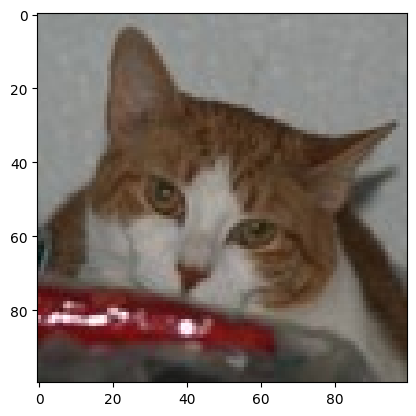

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 24s 671ms/step - loss: 0.7156 - accuracy: 0.4910
Epoch 2/10
32/32 [==============================] - 20s 636ms/step - loss: 0.6898 - accuracy: 0.5770
Epoch 3/10
32/32 [==============================] - 24s 756ms/step - loss: 0.6541 - accuracy: 0.6270
Epoch 4/10
32/32 [==============================] - 20s 639ms/step - loss: 0.5910 - accuracy: 0.6885
Epoch 5/10
32/32 [==============================] - 22s 691ms/step - loss: 0.5661 - accuracy: 0.7200
Epoch 6/10
32/32 [==============================] - 20s 632ms/step - loss: 0.5262 - accuracy: 0.7410
Epoch 7/10
32/32 [==============================] - 24s 756ms/step - loss: 0.4833 - accuracy: 0.7825
Epoch 8/10
32/32 [==============================] - 22s 668ms/step - loss: 0.4624 - accuracy: 0.7890
Epoch 9/10
32/32 [==============================] - 21s 656ms/step - loss: 0.4154 - accuracy: 0.8175
Epoch 10/10
32/32 [==============================] - 23s 691ms/step - loss: 0.4018 - accura

In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 84ms/step - loss: 0.5695 - accuracy: 0.7075


[0.5695134997367859, 0.7074999809265137]

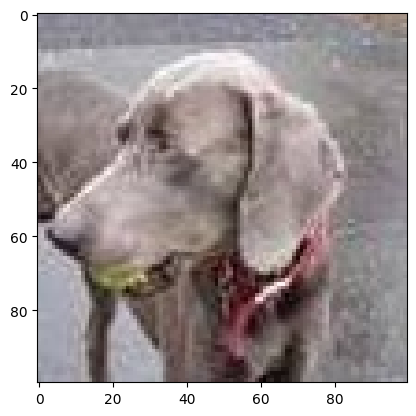

1/1 [==============================] - 0s 34ms/step
Our model says it is a : dog


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)